This notebook shows the plots which compare 2005 UD with other asteroids, meteorites, and lunar samples.

In [1]:
%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity = 'last_expr'     

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

from io import StringIO
import numpy as np
import pandas as pd
# from scipy.optimize import curve_fit
import ysvisutilpy2005ud as yvu


uddata = StringIO('''h h_err a0 a0_err Pmin Pmin_err
0.1972 0.0035 19.71 0.14 -1.17 0.03
''')
# Before revision 1: 0.193 0.003 19.63 0.11 -1.12 0.05
# Before revision 1: 0.195 0.003 19.66 0.11 -1.15 0.02

#      bound | unbound
hs  = [0.1965 , 0.1972]
dhs = [0.0055 , 0.0035]
hs = np.array(hs)
dhs = np.array(dhs)

# the bound (c1/c2 positive) and unbound (allowed negative) results.

uddata = pd.read_csv(uddata, sep=' ')
bennu = pd.DataFrame(data=[[0.276, 0.012, 17.88, 0.40, -1.43, 0.14]], 
                     columns=['h', 'h_err', 'a0', 'a0_err', 'Pmin', 'Pmin_err'])

FIGDIR = Path("figs")
DATADIR = Path("../data")
DATADIR2 = Path("../../../__secured_data")  # Data by courtesy of I. Belskaya (to M. Ishiguro)

poltab = pd.read_csv(DATADIR / "GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
dg_ptab = poltab.groupby("category")
categs = list(dg_ptab.groups.keys())

In [3]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

In [4]:
_df1 = pd.read_csv(DATADIR2/"Belskaya_dataPminAlpha_BCFG.DAT", sep='\t',
                   names=["num", "name", "a0", "a0_err", "Pmin", "Pmin_err", "type"])
_df2 = pd.read_csv(DATADIR2/"Belskaya_dataPminAlpha_others.DAT", sep='\t',
                   names=["num", "name", "a0", "a0_err", "Pmin", "Pmin_err", "type"])
df_Bel = pd.concat([_df1, _df2])
df_Bel["Pmin"] *= -1

df_gd86 = pd.read_csv(DATADIR/"GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
df_l = df_gd86.loc[(df_gd86['category'].str.startswith("Lunar"))]
df_m1 = df_gd86.loc[(
    (df_gd86['category'] == 'Meteoritic Powder')
   &(df_gd86['type_original'].str.startswith('C'))
)]

df_m2 = pd.read_csv(DATADIR/"1977LPSC....8.1091Z.csv")
df_m2 = df_m2.loc[(
    (df_m2["description"].str.contains("Chondrite", na=False))
   &(df_m2["Filter"].isin(["O (0.585)", "G"]))
)]

# Fig 4
## With Lunar data:

/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:22

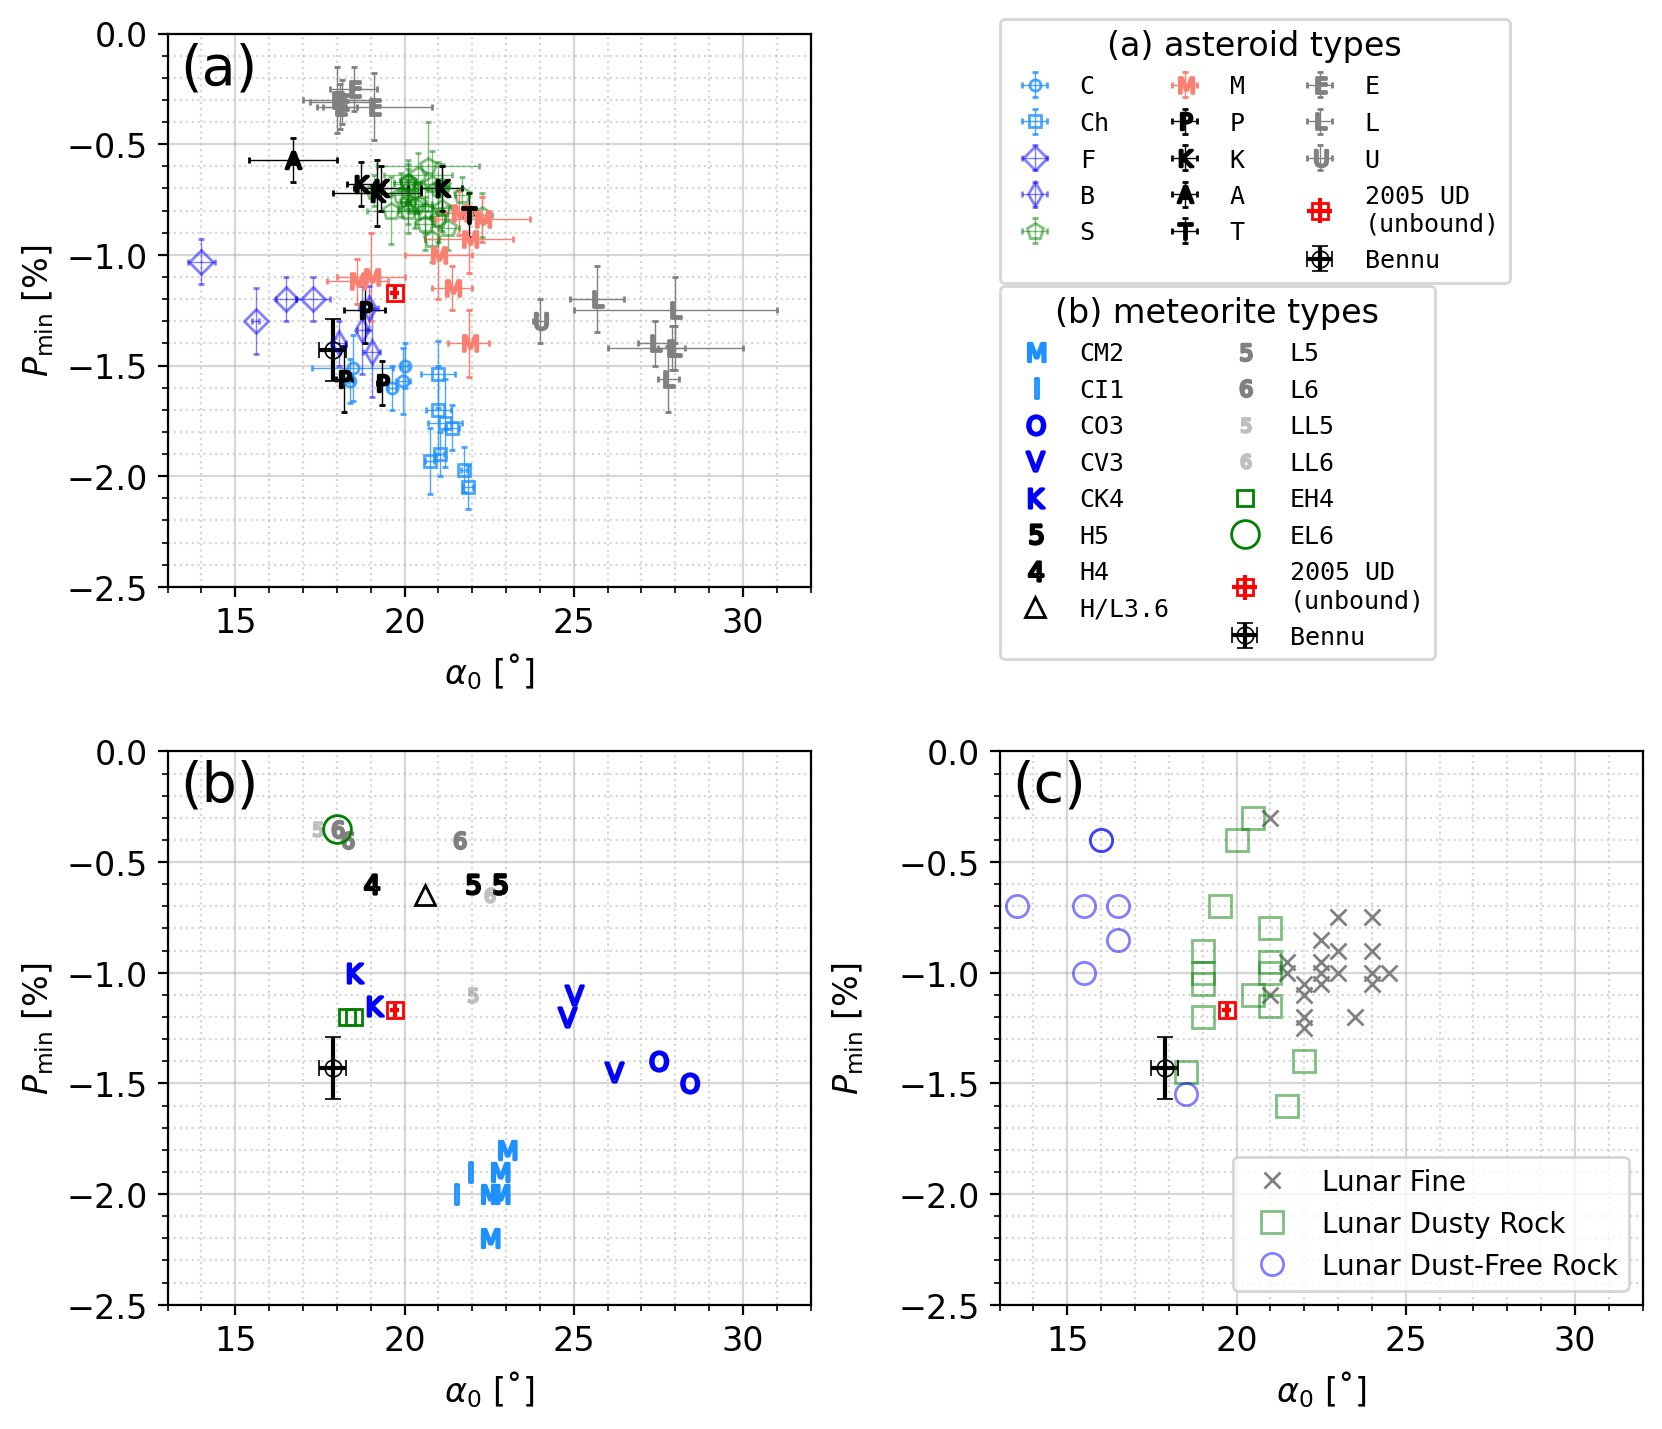

In [5]:
kws_a = {
    "C":  dict(marker='o', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
    "Ch": dict(marker='s', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
#     "Ch": dict(marker='$\mathrm{Ch}$', mfc='none', ms=6, color='dodgerblue', alpha=0.8),
#     "B":  dict(marker='x', mfc='none', ms=4, color='b', alpha=0.5),
#     "F":  dict(marker='D', mfc='none', ms=4, color='b', alpha=0.5),
    "F":  dict(marker='D', mfc='none', ms=6, color='b', alpha=0.5),
    "B":  dict(marker='d', mfc='none', ms=6, color='b', alpha=0.5),
    "S":  dict(marker='p', mfc='none', ms=6, color='g', alpha=0.5),
    "M":  dict(marker='$\mathrm{M}$', mfc='none', ms=6, color='salmon'),
    "P":  dict(marker='$\mathrm{P}$', mfc='none', ms=6, color='k'),
    "K":  dict(marker='$\mathrm{K}$', mfc='none', ms=6, color='k'),
    "A":  dict(marker='$\mathrm{A}$', mfc='none', ms=6, color='k'),
    "T":  dict(marker='$\mathrm{T}$', mfc='none', ms=6, color='k'),
#     "M":  dict(marker='^', mfc='none', ms=4, color='darkorange', alpha=1),
#     "P":  dict(marker='4', mfc='none', ms=8, color='tomato'),
#     "L":  dict(marker='1', mfc='none', ms=8, color='g'),
#     "M":  dict(marker='^', mfc='none', ms=4, color='gray'),
#     "P":  dict(marker='P', mfc='none', ms=5, color='gray'),
#     "E":  dict(marker='d', mfc='none', ms=4, color='chocolate', alpha=0.8),
#     "E":  dict(marker='d', mfc='none', ms=6, color='gray'),
    "E":  dict(marker='$\mathrm{E}$', mfc='none', ms=6, color='gray'),
    "L":  dict(marker='$\mathrm{L}$', mfc='none', ms=6, color='gray'),
    "U":  dict(marker='$\mathrm{U}$', mfc='none', ms=6, color='gray'),
}

kws_m = {
# CC
#     "CM2": dict(marker='P', mfc='none', ms=6, color='dodgerblue'),
#     "CI1": dict(marker='x', mfc='none', ms=7, color='dodgerblue'),
#     "CO3": dict(marker='o', mfc='none', ms=7, color='b'),
#     "CV3": dict(marker='D', mfc='none', ms=7, color='b'),
#     "CK4": dict(marker='s', mfc='none', ms=7, color='b'),
#     "CM2": dict(text='M', marker='$\mathrm{M}$', mfc='none', ms=9, color='dodgerblue'),
#     "CI1": dict(text='I', marker='$\mathrm{I}$', mfc='none', ms=9, color='dodgerblue'),
#     "CO3": dict(text='O', marker='$\mathrm{O}$', mfc='none', ms=9, color='b'),
#     "CV3": dict(text='V', marker='$\mathrm{V}$', mfc='none', ms=9, color='b'),
#     "CK4": dict(text='K', marker='$\mathrm{K}$', mfc='none', ms=9, color='b'),
    "CM2": dict(marker='$\mathrm{M}$', mfc='none', ms=7, color='dodgerblue'),
    "CI1": dict(marker='$\mathrm{I}$', mfc='none', ms=7, color='dodgerblue'),
    "CO3": dict(marker='$\mathrm{O}$', mfc='none', ms=7, color='b'),
    "CV3": dict(marker='$\mathrm{V}$', mfc='none', ms=7, color='b'),
    "CK4": dict(marker='$\mathrm{K}$', mfc='none', ms=7, color='b'),
# etc (OC)
    "H5":     dict(marker=r'$5$', mfc='none', ms=7, color='k'),
    "H4":     dict(marker=r'$4$', mfc='none', ms=7, color='k'),
    "H/L3.6": dict(marker=r'^', mfc='none', ms=7, color='k'),
    "L5":     dict(marker=r'$5$', mfc='none', ms=6, color='gray'),
    "L6":     dict(marker=r'$6$', mfc='none', ms=6, color='gray'),
    "LL5":    dict(marker=r'$5$', mfc='none', ms=5, color='gray', alpha=0.5),
    "LL6":    dict(marker=r'$6$', mfc='none', ms=5, color='gray', alpha=0.5),
# Enstatite
    "EH4":    dict(marker='s', mfc='none', ms=6, color='g'),
    "EL6":    dict(marker='o', mfc='none', ms=10, color='g'),
#     "H5":     dict(text='H5' , marker='$\mathrm{H5 }$', mfc='none', ms=9, color='gray'),
#     "H4":     dict(text='H4' , marker='$\mathrm{H4 }$', mfc='none', ms=9, color='gray'),
#     "H/L3.6": dict(text='HL' , marker='$\mathrm{HL }$', mfc='none', ms=9, color='gray'),
#     "L5":     dict(text='L5' , marker='$\mathrm{L5 }$', mfc='none', ms=9, color='gray'),
#     "L6":     dict(text='L6' , marker='$\mathrm{L6 }$', mfc='none', ms=9, color='gray'),
#     "LL5":    dict(text='LL5', marker='$\mathrm{LL5}$', mfc='none', ms=9, color='gray'),
#     "LL6":    dict(text='LL6', marker='$\mathrm{LL6}$', mfc='none', ms=9, color='gray'),
#     "EH4":    dict(text='EH4', marker='$\mathrm{EH4}$', mfc='none', ms=9, color='gray'),
#     "EL6":    dict(text='EL6', marker='$\mathrm{EL6}$', mfc='none', ms=9, color='gray'),
}

kws_l = {
    'Lunar Fine':           dict(marker='x', mfc='none', ms=6, color='gray'),
    'Lunar Dusty Rock':     dict(marker='s', mfc='none', ms=8, color='g', alpha=0.5),
    'Lunar Dust-Free Rock': dict(marker='o', mfc='none', ms=8, color='b', alpha=0.5)
}

udkw1 = dict(marker='s', color='r', mfc='none', ms=6, mew=1., ls='', capsize=0, alpha=1)
udkw2 = dict(marker='s', color='r', mfc='none', ms=6, mew=1., ls='', capsize=0, alpha=1)
bnkw = dict(marker='o', color='k', mfc='none', ms=6, mew=0.6, ls='', capsize=3, alpha=1)
errbfmt = dict(ls='', capsize=1, elinewidth=0.5)
nanpos = dict(x=np.nan, y=np.nan, xerr=np.nan, yerr=np.nan)

fig, axs = plt.subplots(2, 2, figsize=(8.5, 7.5), gridspec_kw=None)
axa = axs[0, 0]  # asteroids
axm = axs[1, 0]  # meteorites
axl = axs[1, 1]  # lunar


_ax1 = axs[0, 1]
_ax2 = axs[0, 1].twinx()  # Fake axes

xval, yval = "a0", "Pmin"
for t, kw in kws_a.items():
    df = df_Bel.loc[df_Bel["type"] == t]
    axa.errorbar(
        df[xval], df[yval], **errbfmt, **kw,
        xerr=df[f"{xval}_err"], yerr=df[f"{yval}_err"]
    )    
    _ax1.errorbar(**nanpos, **errbfmt, **kw, label=t)

for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
#     for df in [df1, df2]:
#         for _, row in df.iterrows():
#             axm.text(row[xval], row[yval], kw['text'], color=kw['color'],
#                      ha='center', va='center', fontsize=kw['ms'], fontdict={'family': 'monospace'})
#     del kw["text"]
    _ax2.plot(np.nan, np.nan, **kw, ls='', label=t)
    # For triangular markers, center is difficult to know, 
    # so I put ``+'' like grid to legend by using errorbar

for t, kw in kws_l.items():
    df = df_l.loc[df_l["category"] == t]
    axl.plot(df[xval], df[yval], ls='', **kw, label=t)
axl.legend(loc=4, fontsize=10)
    
abc = ['(a)', '(b)', '(c)']
for i, ax in enumerate([axa, axm, axl]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
#     ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
#                 xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
for aa in [_ax1, _ax2]:
    aa.axis('off')
    aa.errorbar(**nanpos, **udkw1, label="2005 UD\n(unbound)")
#     aa.errorbar(**nanpos, **udkw2, label="2005 UD\n(bound)")
    aa.errorbar(**nanpos, **bnkw, label="Bennu")

# axa.set(ylabel=r"$P_\mathrm{min}$ [%]", ylim=(-2.5, 0), xlim=(13, 32))
for ax in [axl, axa, axm]:
    ax.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$\alpha_0$ [˚]", ylim=(-2.5, 0), xlim=(13, 32))
_ax1.legend(loc=(0.0, 0.55), ncol=3, fontsize=9, title="(a) asteroid types", prop={'family': 'monospace', 'size': 9})
_ax2.legend(loc=(0.0, -0.13), ncol=2, fontsize=9, title="(b) meteorite types", prop={'family': 'monospace', 'size': 9})

yvu.linticker([axa, axm, axl], xmajlockws=5, xminlockws=1, ymajlockws=0.5, yminlockws=0.1)
plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"a0-Pmin_withlunar.pdf")
plt.show();

## Without Lunar data:

/Users/ysbach/opt/anaconda3/envs/2005ud/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


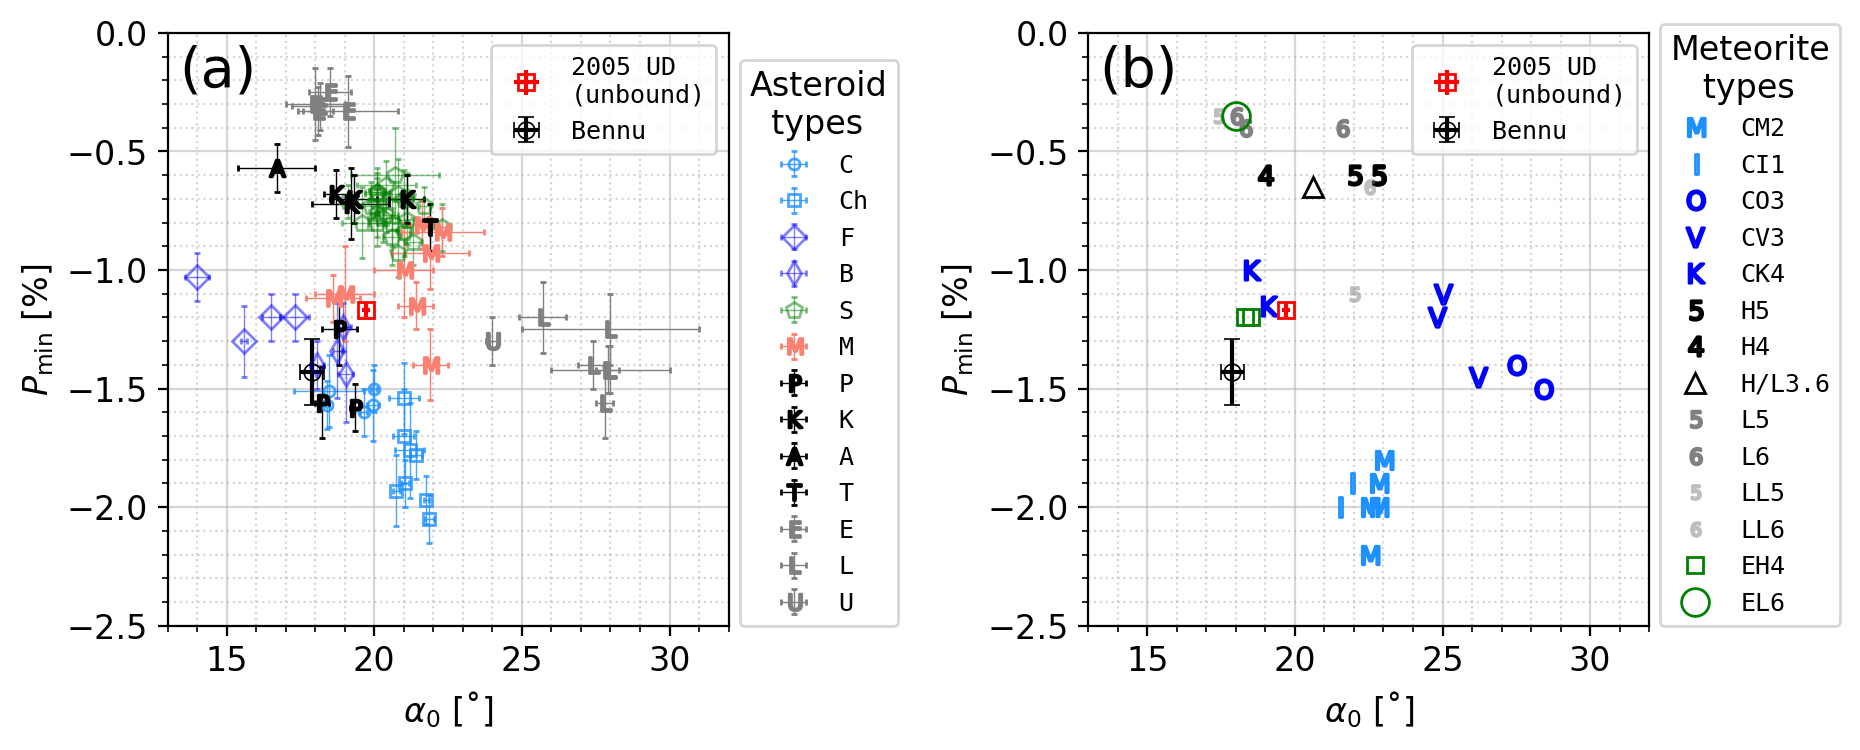

In [6]:
kws_a = {
    "C":  dict(marker='o', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
    "Ch": dict(marker='s', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
#     "Ch": dict(marker='$\mathrm{Ch}$', mfc='none', ms=6, color='dodgerblue', alpha=0.8),
#     "B":  dict(marker='x', mfc='none', ms=4, color='b', alpha=0.5),
#     "F":  dict(marker='D', mfc='none', ms=4, color='b', alpha=0.5),
    "F":  dict(marker='D', mfc='none', ms=6, color='b', alpha=0.5),
    "B":  dict(marker='d', mfc='none', ms=6, color='b', alpha=0.5),
    "S":  dict(marker='p', mfc='none', ms=6, color='g', alpha=0.5),
    "M":  dict(marker='$\mathrm{M}$', mfc='none', ms=6, color='salmon'),
    "P":  dict(marker='$\mathrm{P}$', mfc='none', ms=6, color='k'),
    "K":  dict(marker='$\mathrm{K}$', mfc='none', ms=6, color='k'),
    "A":  dict(marker='$\mathrm{A}$', mfc='none', ms=6, color='k'),
    "T":  dict(marker='$\mathrm{T}$', mfc='none', ms=6, color='k'),
#     "M":  dict(marker='^', mfc='none', ms=4, color='darkorange', alpha=1),
#     "P":  dict(marker='4', mfc='none', ms=8, color='tomato'),
#     "L":  dict(marker='1', mfc='none', ms=8, color='g'),
#     "M":  dict(marker='^', mfc='none', ms=4, color='gray'),
#     "P":  dict(marker='P', mfc='none', ms=5, color='gray'),
#     "E":  dict(marker='d', mfc='none', ms=4, color='chocolate', alpha=0.8),
#     "E":  dict(marker='d', mfc='none', ms=6, color='gray'),
    "E":  dict(marker='$\mathrm{E}$', mfc='none', ms=6, color='gray'),
    "L":  dict(marker='$\mathrm{L}$', mfc='none', ms=6, color='gray'),
    "U":  dict(marker='$\mathrm{U}$', mfc='none', ms=6, color='gray'),
}

kws_m = {
# CC
#     "CM2": dict(marker='P', mfc='none', ms=6, color='dodgerblue'),
#     "CI1": dict(marker='x', mfc='none', ms=7, color='dodgerblue'),
#     "CO3": dict(marker='o', mfc='none', ms=7, color='b'),
#     "CV3": dict(marker='D', mfc='none', ms=7, color='b'),
#     "CK4": dict(marker='s', mfc='none', ms=7, color='b'),
#     "CM2": dict(text='M', marker='$\mathrm{M}$', mfc='none', ms=9, color='dodgerblue'),
#     "CI1": dict(text='I', marker='$\mathrm{I}$', mfc='none', ms=9, color='dodgerblue'),
#     "CO3": dict(text='O', marker='$\mathrm{O}$', mfc='none', ms=9, color='b'),
#     "CV3": dict(text='V', marker='$\mathrm{V}$', mfc='none', ms=9, color='b'),
#     "CK4": dict(text='K', marker='$\mathrm{K}$', mfc='none', ms=9, color='b'),
    "CM2": dict(marker='$\mathrm{M}$', mfc='none', ms=7, color='dodgerblue'),
    "CI1": dict(marker='$\mathrm{I}$', mfc='none', ms=7, color='dodgerblue'),
    "CO3": dict(marker='$\mathrm{O}$', mfc='none', ms=7, color='b'),
    "CV3": dict(marker='$\mathrm{V}$', mfc='none', ms=7, color='b'),
    "CK4": dict(marker='$\mathrm{K}$', mfc='none', ms=7, color='b'),
# etc (OC)
    "H5":     dict(marker=r'$5$', mfc='none', ms=7, color='k'),
    "H4":     dict(marker=r'$4$', mfc='none', ms=7, color='k'),
    "H/L3.6": dict(marker=r'^', mfc='none', ms=7, color='k'),
    "L5":     dict(marker=r'$5$', mfc='none', ms=6, color='gray'),
    "L6":     dict(marker=r'$6$', mfc='none', ms=6, color='gray'),
    "LL5":    dict(marker=r'$5$', mfc='none', ms=5, color='gray', alpha=0.5),
    "LL6":    dict(marker=r'$6$', mfc='none', ms=5, color='gray', alpha=0.5),
# Enstatite
    "EH4":    dict(marker='s', mfc='none', ms=6, color='g'),
    "EL6":    dict(marker='o', mfc='none', ms=10, color='g'),
#     "H5":     dict(text='H5' , marker='$\mathrm{H5 }$', mfc='none', ms=9, color='gray'),
#     "H4":     dict(text='H4' , marker='$\mathrm{H4 }$', mfc='none', ms=9, color='gray'),
#     "H/L3.6": dict(text='HL' , marker='$\mathrm{HL }$', mfc='none', ms=9, color='gray'),
#     "L5":     dict(text='L5' , marker='$\mathrm{L5 }$', mfc='none', ms=9, color='gray'),
#     "L6":     dict(text='L6' , marker='$\mathrm{L6 }$', mfc='none', ms=9, color='gray'),
#     "LL5":    dict(text='LL5', marker='$\mathrm{LL5}$', mfc='none', ms=9, color='gray'),
#     "LL6":    dict(text='LL6', marker='$\mathrm{LL6}$', mfc='none', ms=9, color='gray'),
#     "EH4":    dict(text='EH4', marker='$\mathrm{EH4}$', mfc='none', ms=9, color='gray'),
#     "EL6":    dict(text='EL6', marker='$\mathrm{EL6}$', mfc='none', ms=9, color='gray'),
}

udkw1 = dict(marker='s', color='r', mfc='none', ms=6, mew=1., ls='', capsize=0, alpha=1)
udkw2 = dict(marker='s', color='r', mfc='none', ms=6, mew=1., ls='', capsize=0, alpha=1)
bnkw = dict(marker='o', color='k', mfc='none', ms=6, mew=0.6, ls='', capsize=3, alpha=1)
errbfmt = dict(ls='', capsize=1, elinewidth=0.5)
nanpos = dict(x=np.nan, y=np.nan, xerr=np.nan, yerr=np.nan)

fig, axs = plt.subplots(1, 2, figsize=(9.5, 4), gridspec_kw=None)
axa = axs[0]  # asteroids
axm = axs[1]  # meteorites
_ax1 = axa.twinx()
_ax2 = axm.twinx()  # Fake axes

xval, yval = "a0", "Pmin"
for t, kw in kws_a.items():
    df = df_Bel.loc[df_Bel["type"] == t]
    axa.errorbar(
        df[xval], df[yval], **errbfmt, **kw,
        xerr=df[f"{xval}_err"], yerr=df[f"{yval}_err"], label=t
    )    

for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw, label=t)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    
abc = ['(a)', '(b)', '(c)']
for i, ax in enumerate([axa, axm]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    ax.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$\alpha_0$ [˚]", ylim=(-2.5, 0), xlim=(13, 32))
    
for ax in [_ax1, _ax2]:
    ax.axis("off")
    ax.errorbar(**nanpos, **udkw1, label="2005 UD\n(unbound)")
    ax.errorbar(**nanpos, **bnkw, label="Bennu")
    ax.legend(loc=1, fontsize=9, prop={'family': 'monospace', 'size': 9})
    
axa.legend(loc=(1.02, -0.), ncol=1, fontsize=9, title="Asteroid\n  types", prop={'family': 'monospace', 'size': 9})
axm.legend(loc=(1.02, -0.), ncol=1, fontsize=9, title="Meteorite\n   types", prop={'family': 'monospace', 'size': 9})

yvu.linticker([axa, axm], xmajlockws=5, xminlockws=1, ymajlockws=0.5, yminlockws=0.1)
plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"a0-Pmin.pdf")
plt.show();

Using $\lg p_V = C_1 \lg h + C_2$ with Lupishko 2018 ($C_1 = -0.989$, $C_2 = -1.719$ without error-bars)

# Fig 5

## With Lunar data:

In [7]:
C1, C2 = -0.989, -1.719
pV_phae = np.array([0.08, 0.12])  # rough min/max
h_phae = 10**((np.log10(pV_phae) - C2) / C1)
h_phae

array([0.23495837, 0.1559341 ])

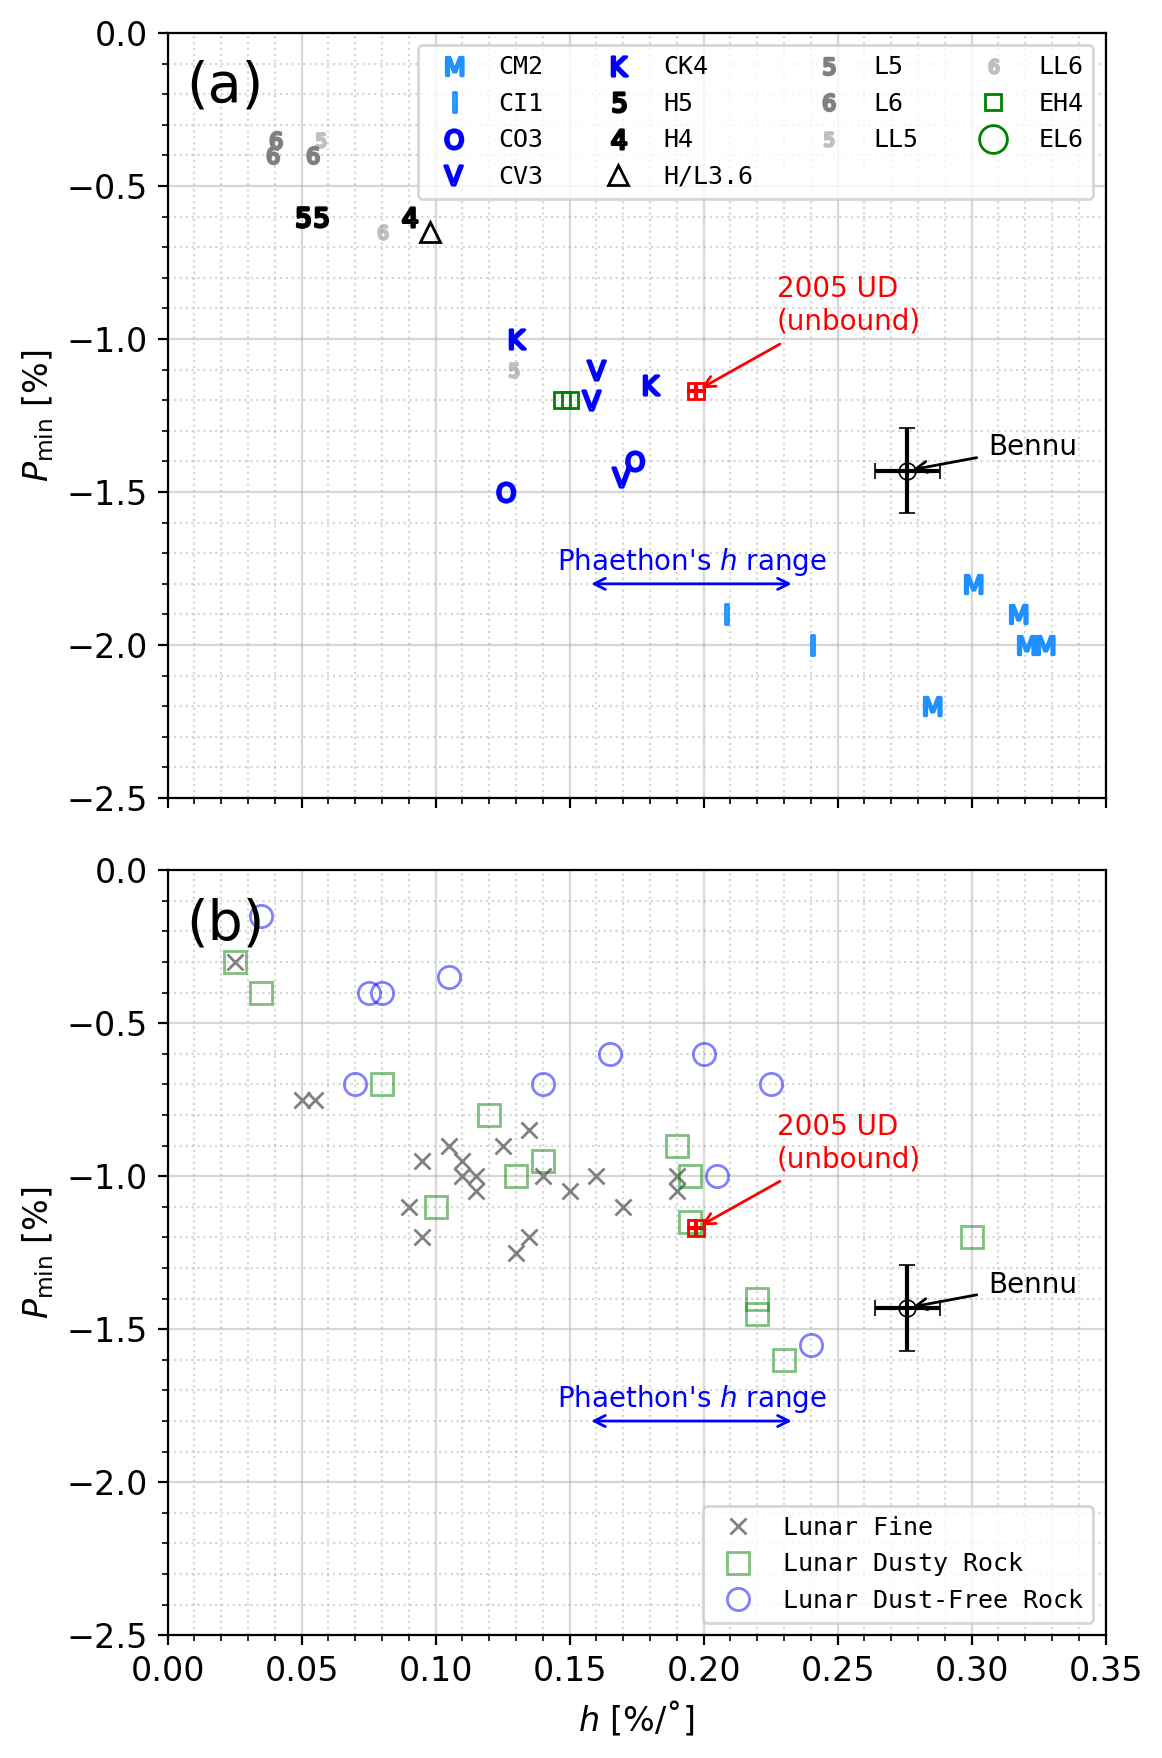

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(6., 9), 
                        sharex=True, sharey=True, gridspec_kw=None)

axm = axs[0]  # meteorites
axl = axs[1]  # lunar

xval, yval = "h", "Pmin"
for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw, label=t)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    # For triangular markers, center is difficult to know so I put ``+'' like grid to legend by using errorbar

for t, kw in kws_l.items():
    df = df_l.loc[df_l["category"] == t]
#     axl.plot(df[xval], df[yval], ls='', **kw, label=t.split(' ')[1])
    axl.plot(df[xval], df[yval], ls='', **kw, label=t)

annotkw1 = dict(color='r', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='r'))
annotkw2 = dict(color='k', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='k'))
annotkw3 = dict(color='b', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="<->", color='b'))

for i, ax in enumerate([axm, axl]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
#     ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
#                 xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.annotate(
        "2005 UD\n(unbound)", 
        xy=(uddata[xval][0], uddata[yval][0]),
        xytext=(uddata[xval][0] + 0.03, uddata[yval][0] + 0.2),
        **annotkw1,
    )
    ax.annotate(
        "Bennu", 
        xy=(bennu[xval], bennu[yval]),
        xytext=(bennu[xval] + 0.03, bennu[yval] + 0.05),
        **annotkw2
    )
    ax.annotate(
        '',
        xy=(min(h_phae), -1.8),
        xytext=(max(h_phae), -1.8),
        color='b', fontsize=10, xycoords='data', 
        arrowprops=dict(arrowstyle="<->", color='b')
    )
    ax.annotate(
        "Phaethon's $h$ range",
        xy=(np.mean(h_phae), -1.8),
        horizontalalignment='center',
        xytext=(0, 5),
        color='b', fontsize=10, xycoords='data', 
        textcoords='offset points',
#         arrowprops=dict(arrowstyle="", color='b')
    )
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
axm.legend(loc=1, ncol=4, prop={'family': 'monospace', 'size': 9})
axl.legend(loc=4, ncol=1, prop={'family': 'monospace', 'size': 9})
# axm.legend(bbox_to_anchor=(1, 1), fontsize=10)
# axl.legend(bbox_to_anchor=(1, 1), fontsize=10)

axm.set(ylabel=r"$P_\mathrm{min}$ [%]", ylim=(-2.5, 0), xlim=(0, 0.35))
axl.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$h$ [%/˚]", xlim=(0, 0.35))

yvu.linticker([axm, axl], xmajlockws=0.05, xminlockws=0.01, ymajlockws=0.5, yminlockws=0.1)

plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"h-Pmin_withlunar.pdf")
plt.show()

## Without Lunar data:

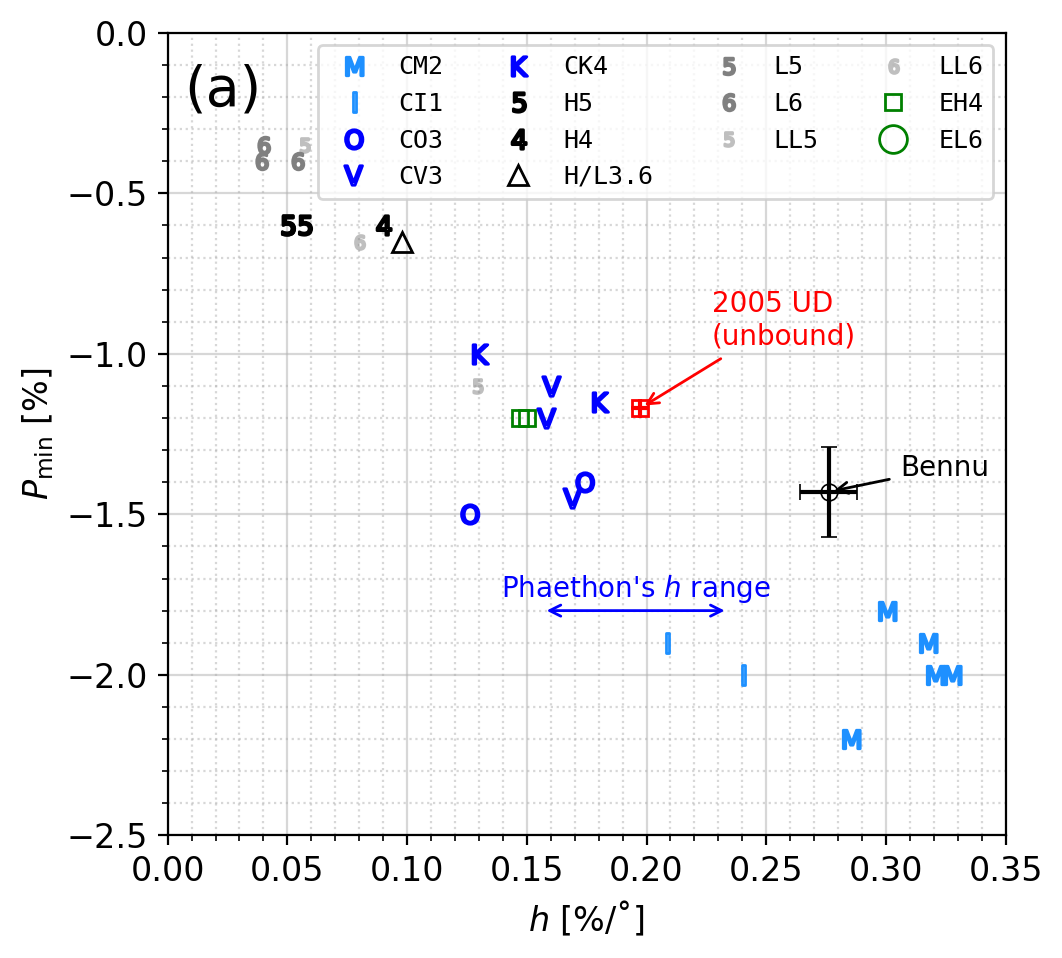

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5), 
                        sharex=True, sharey=True, gridspec_kw=None)

axm = axs  # meteorites

xval, yval = "h", "Pmin"
for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw, label=t)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    # For triangular markers, center is difficult to know so I put ``+'' like grid to legend by using errorbar

annotkw1 = dict(color='r', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='r'))
annotkw2 = dict(color='k', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='k'))
annotkw3 = dict(color='b', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="<->", color='b'))

for i, ax in enumerate([axm]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
#     ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
#                 xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.annotate(
        "2005 UD\n(unbound)", 
        xy=(uddata[xval][0], uddata[yval][0]),
        xytext=(uddata[xval][0] + 0.03, uddata[yval][0] + 0.2),
        **annotkw1,
    )
    ax.annotate(
        "Bennu", 
        xy=(bennu[xval], bennu[yval]),
        xytext=(bennu[xval] + 0.03, bennu[yval] + 0.05),
        **annotkw2
    )
    ax.annotate(
        '',
        xy=(min(h_phae), -1.8),
        xytext=(max(h_phae), -1.8),
        color='b', fontsize=10, xycoords='data', 
        arrowprops=dict(arrowstyle="<->", color='b')
    )
    ax.annotate(
        "Phaethon's $h$ range",
        xy=(np.mean(h_phae), -1.8),
        horizontalalignment='center',
        xytext=(0, 5),
        color='b', fontsize=10, xycoords='data', 
        textcoords='offset points',
#         arrowprops=dict(arrowstyle="", color='b')
    )
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
axm.legend(loc=1, ncol=4, prop={'family': 'monospace', 'size': 9})
# axm.legend(bbox_to_anchor=(1, 1), fontsize=10)

axm.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$h$ [%/˚]", ylim=(-2.5, 0), xlim=(0, 0.35))

yvu.linticker([axm], xmajlockws=0.05, xminlockws=0.01, ymajlockws=0.5, yminlockws=0.1)

plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"h-Pmin.pdf")
plt.show()

## Pmax-A5 chart
Below is the comparison between the lab samples and asteroids, on the Pmax-A5 chart.

See [this Notebook](https://nbviewer.jupyter.org/github/ysBach/KMTNet_Toutatis/blob/master/Notebooks/05_polarimetry_plot.ipynb) of [Bach+2019](https://ui.adsabs.harvard.edu/abs/2019JKAS...52...71B/abstract) for some detailed discussions on this plot (full notebooks available via their [Appendix B](https://github.com/ysBach/KMTNet_Toutatis)).
  * Note: Original data from [Geake + Dollfus 1986](https://ui.adsabs.harvard.edu/abs/1986MNRAS.218...75G/abstract)

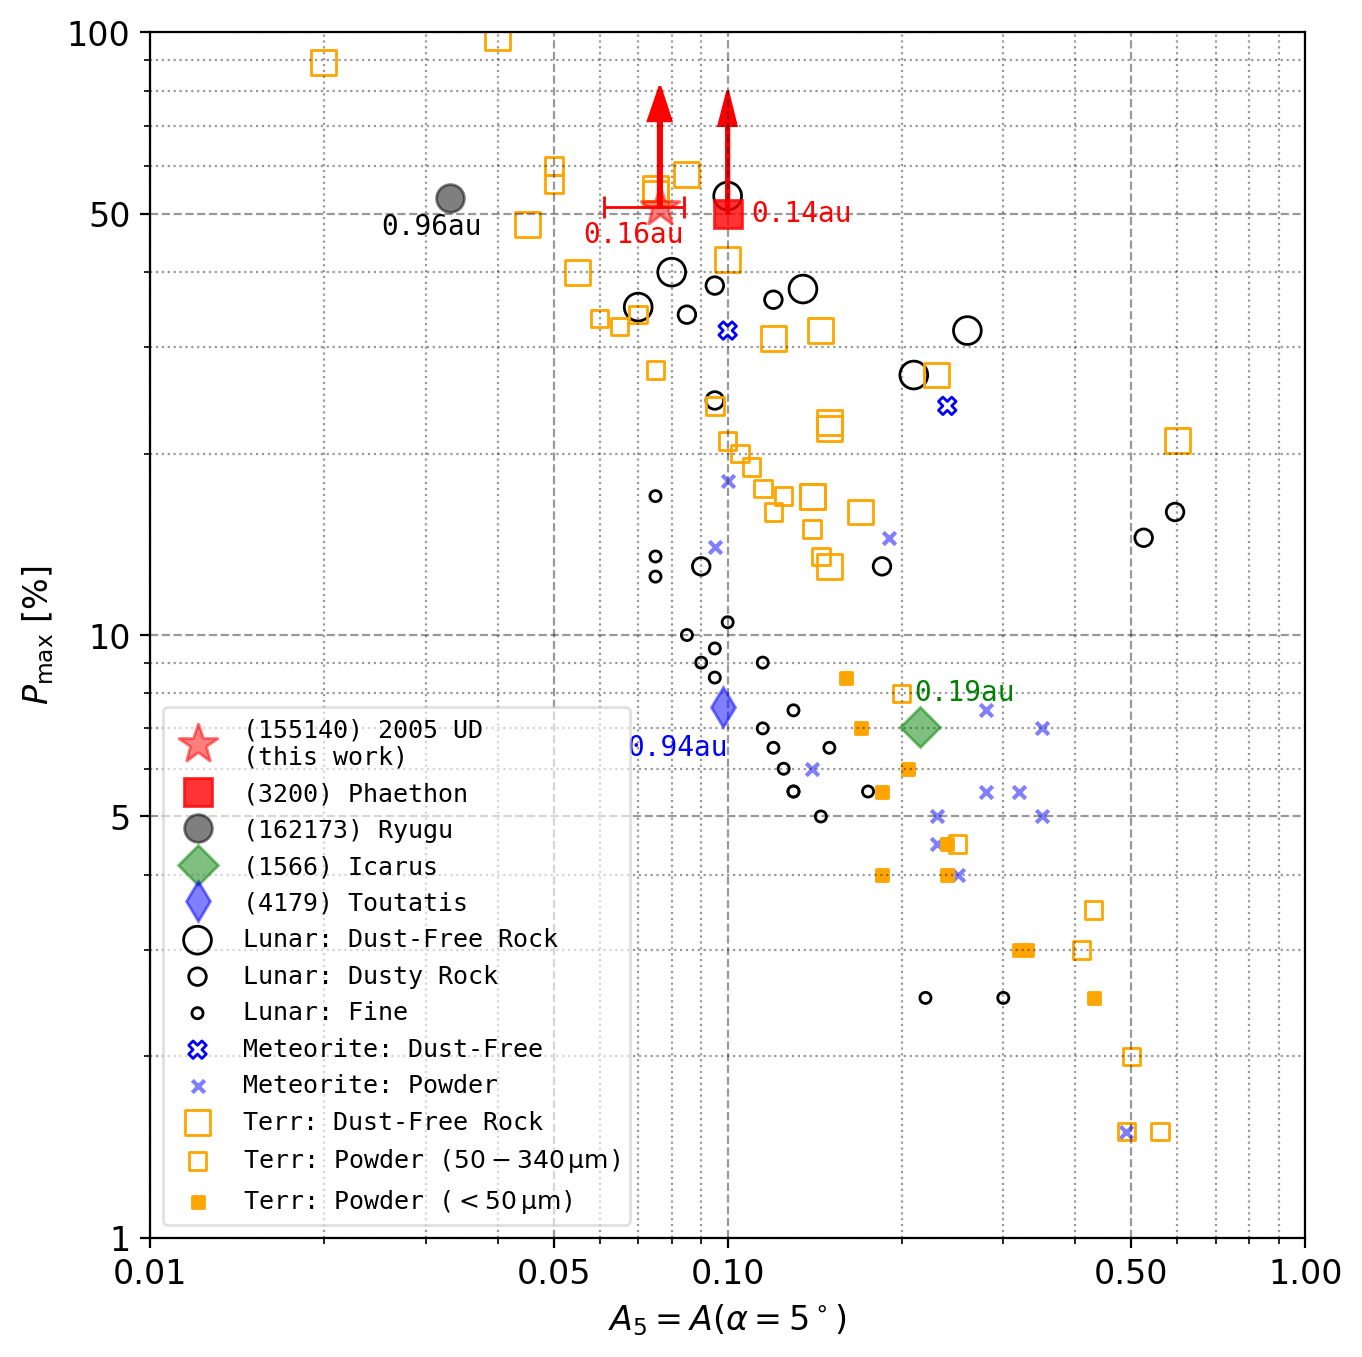

In [10]:
Afmter = ticker.FormatStrFormatter("%.2f")
Pfmter = ticker.FormatStrFormatter("%.0f")

size = 40

markers = {"Lunar Dust-Free Rock":
               dict(marker='o', s=size*2.5, edgecolors='k', facecolors='none',
                    label="Lunar: Dust-Free Rock"),
           "Lunar Dusty Rock":
               dict(marker='o', s=size, edgecolors='k', facecolors='none',
                    label="Lunar: Dusty Rock"),
           "Lunar Fine":
               dict(marker='o', s=size/2.5, edgecolors='k', facecolors='none', 
                    label="Lunar: Fine"),
           "Meteorite Dust-Free":
               dict(marker='X', s=size, edgecolors='b', facecolors='none',
                    label="Meteorite: Dust-Free"),
           "Meteoritic Powder":
               dict(marker='x', s=size/2, c='b', alpha=0.5, 
                    label="Meteorite: Powder"),
           "Rock Dust-Free":
               dict(marker='s', s=size*2., edgecolors='orange', facecolors='none',
                    label="Terr: Dust-Free Rock"),
           "Rock Powder 340":
               dict(marker='s', s=size, edgecolors='orange', facecolors='none',
                    label="Terr: Powder ($50 - 340 \,\mathrm{\mu m}$)"),
           "Rock Powder 50":
               dict(marker='s', s=size/2.5, edgecolors='orange', facecolors='orange',
                    label="Terr: Powder ($< 50 \,\mathrm{\mu m}$)")
           }

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

for categ, group in dg_ptab:
    ax.scatter(group["A5"], group["Pmax"], **markers[categ])

fontdict = {'family':"monospace", "size": 10}
# 2005UD
oefactor = 1.31
alb_5_ud = 0.1/oefactor # A_5 = p_V/1.31 : Factor 1.31 same as Phaethon in ItoT+2018NatCo paper.
pmax_ud = 51.31
dx = np.array([[alb_5_ud - 0.08/oefactor], [0.11/oefactor - alb_5_ud]])
_ = ax.plot(alb_5_ud, pmax_ud, marker='*', color='r', ms=15,
            ls='', alpha=0.5, label="(155140) 2005 UD \n(this work)")
color = _[0].get_color()
ax.errorbar(alb_5_ud, pmax_ud, xerr=dx, marker=None, color=color, ms=10,
            ls='', elinewidth=1, capsize=4, label=None)
ax.arrow(alb_5_ud, pmax_ud, dx=0, dy=20, head_width=0.007, head_length=10, fc=color, ec=color)
ax.text(alb_5_ud*0.9, pmax_ud*0.9, "0.16au", ha="center", va="center", fontdict=fontdict, color=color)

# Phaethon
alb_5_phae = 0.10
pmax_phae = 50
_ = ax.plot(alb_5_phae, pmax_phae, marker='s', color="r", ms=10,
            ls='', alpha=0.8, label="(3200) Phaethon")
color = _[0].get_color()
ax.arrow(alb_5_phae, pmax_phae, dx=0, dy=20, head_width=0.007, head_length=10, fc=color, ec=color)
ax.text(alb_5_phae*1.1, pmax_phae, "0.14au", ha="left", va="center", fontdict=fontdict, color=color)

# Ryugu
alb_5_ryugu = 0.033  # albedo at alpha=6 deg, TatsumiE+20, adopted from KurodaD+21
pmax_ryugu = 53  # KurodaD+21
_ = ax.plot(alb_5_ryugu, pmax_ryugu, marker='o', color='k', ms=10,
            ls='', alpha=0.5, label="(162173) Ryugu")
color = _[0].get_color()
ax.text(alb_5_ryugu*0.93, pmax_ryugu*0.9, "0.96au", ha="center", va='center', fontdict=fontdict, color=color)

# Icarus
_ = ax.plot(0.215, 7.04, marker='D', color='g', ms=10,
            ls='', alpha=0.5, label="(1566) Icarus")
color = _[0].get_color()
ax.text(0.21, 7.8, "0.19au", fontdict=fontdict, color=color)

# Toutatis
_ = ax.plot(0.098, 7.6, marker='d', color='b', ms=10,
            ls='', alpha=0.5, label="(4179) Toutatis")
color = _[0].get_color()
ax.text(0.10, 6.5, "0.94au", ha="right", va="center", fontdict=fontdict, color=color)


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01, 1)
ax.set_ylim(1, 100)

xlines = [0.01, 0.05, 0.10, 0.50, 1.]
ylines = [1, 5, 10, 50, 100]

ax.set_xticks(xlines)
ax.set_yticks(ylines)
ax.xaxis.set_major_formatter(Afmter)
ax.yaxis.set_major_formatter(Pfmter)

ax.grid(which='minor', ls=':', color='k', alpha=0.4)
ax.grid(which='major', ls='--', color='k', alpha=0.4)

ax.set_xlabel(r"$ A_5 = A(\alpha = 5^\circ) $")
ax.set_ylabel(r"$ P_\mathrm{max} $ [%]")

ax.legend(fontsize=10, ncol=1, framealpha=0.6, prop={'family': 'monospace', 'size': 9})

plt.tight_layout()
plt.savefig(FIGDIR/"fig_Pmax-A5.pdf")

## Albedo from h
The albedo estimation from the h values from four cases: using only the data in this work or all data (incl. Devogele+20 & unpublished) and bound or unbound. 

The equation used is
$$ 
\log_{10}(p_\mathrm{V}) = C_1 \log_{10} h + C_2 ~~,
$$
and its error is estimated by
$$
\Delta p_\mathrm{V} 
  \approx p_\mathrm{V} \ln 10 
    \sqrt{ 
      (\log_{10}h \Delta C_1)^2 
      + (\Delta C_2)^2
      + \left( \frac{C_1 \Delta h}{h \ln 10} \right)^2
    }
$$    
The h and its error are from MC (Monte Carlo), not the LS (least-square). 

In [11]:
#      Cellino+15  Lupishko+18  Masiero+12
c1s  = [-1.111   , -0.989     ]#, -1.207]
c2s  = [-1.781   , -1.719     ]#, -1.892]
dc1s = [0.031    , 0.047      ]#, 0.067]
dc2s = [0.025    , 0.040      ]#, 0.141]

models = ["Cellino+15", "Lupishko+18"]#, "Masiero+12"]
lg = lambda x: np.log10(x)
ln10 = np.log(10)
allalbs = []
alldalbs = []

for model, c1, c2, dc1, dc2 in zip(models, c1s, c2s, dc1s, dc2s):
    print(f"{model} ({c1} +- {dc1} | {c2} +- {dc2})")
    albs = 10**(c1*lg(hs) + c2)
    dalbs = albs*ln10*np.sqrt((lg(hs)*dc1)**2 + (dc2)**2 + ((c1*dhs)/(hs*ln10))**2)
    strs = []
    for alb, dalb in zip(albs, dalbs):
        strs.append(f"$ {alb:.3f} \pm {dalb:.3f} $")
        if model != "Masiero+12":
            allalbs.append(alb)
            alldalbs.append(dalb)
    print(" & ".join(strs) + r" \\")

# Use [1::2] to select only the unbound case
pmin = (np.array(allalbs[1::2]) - alldalbs[1::2]).min()
pmax = (np.array(allalbs[1::2]) + alldalbs[1::2]).max()

Cellino+15 (-1.111 +- 0.031 | -1.781 +- 0.025)
$ 0.101 \pm 0.008 $ & $ 0.101 \pm 0.008 $ \\
Lupishko+18 (-0.989 +- 0.047 | -1.719 +- 0.04)
$ 0.095 \pm 0.012 $ & $ 0.095 \pm 0.012 $ \\


In [12]:
# For Draft LaTeX
H_V = 17.54  # ± 0.02
ps = np.array([pmin, pmax])
diams = 1329/np.sqrt(ps)*10**(-H_V/5)
print(r"\newcommand{{\Deff}}{{\ensuremath{{{:.1f}}}}}".format(diams.mean()))
print(r"\newcommand{{\DeffMax}}{{\ensuremath{{{:.2f}}}}}".format(diams[0]))
print(r"\newcommand{{\DeffMin}}{{\ensuremath{{{:.2f}}}}}".format(diams[1]))
print(r"\newcommand{{\pV}}{{\ensuremath{{{:.3f}}}}}".format(np.mean(ps)))
print(r"\newcommand{{\pVMax}}{{\ensuremath{{{:.3f}}}}}".format(ps[1]))
print(r"\newcommand{{\pVMin}}{{\ensuremath{{{:.3f}}}}}".format(ps[0]))

\newcommand{\Deff}{\ensuremath{1.3}}
\newcommand{\DeffMax}{\ensuremath{1.43}}
\newcommand{\DeffMin}{\ensuremath{1.25}}
\newcommand{\pV}{\ensuremath{0.096}}
\newcommand{\pVMax}{\ensuremath{0.108}}
\newcommand{\pVMin}{\ensuremath{0.084}}
